In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df_full = pd.read_json('imagenette_experiments/grid_search_results_beta_list.json')

# drop columns with beta < 1
#df = df[df['beta'] >= 1.1]
#df = df[df['T'] >= 0.11]

In [16]:
df_full.head()

,beta,T,mean_accuracy,accuracies,seconds
0,2.0,1,77.300858,"[82.03821563720703, 76.78980255126953, 82.1146...",471.422593
1,2.2,1,77.422073,"[82.01273345947266, 78.01273345947266, 77.0445...",466.986559
2,2.4,1,79.041000,"[82.5732421875, 77.27388000488281, 81.70700073...",474.836845
3,2.6,1,79.494919,"[81.78343200683594, 76.50955200195312, 81.7834...",471.500547
4,2.8,1,79.194763,"[83.5668716430664, 79.49044036865234, 83.03184...",464.241735


In [17]:
#cifar
baseline = [65.65, 64.87, 65.57, 63.85, 68.6 , 57.58, 59.34, 71.02, 58.62,
       55.14, 74.48, 59.  , 66.7 , 63.57, 55.65, 66.35, 65.83, 60.27,
       62.54, 59.26, 66.67, 62.93, 58.68, 66.61, 69.94, 64.77, 66.73,
       69.86, 69.63, 64.19, 72.18, 66.78, 65.41, 61.4 , 69.71, 61.86,
       65.01, 68.27, 66.17, 67.54, 69.7 , 64.72, 73.43, 71.87, 59.75,
       71.09, 68.02, 65.83, 64.22, 68.6 , 63.87, 61.72, 66.53, 73.21,
       69.7 , 58.87, 58.71, 59.91, 66.81, 72.78, 69.95, 71.57, 72.3 ,
       60.54, 65.83, 66.88, 58.2 , 64.11, 65.58, 65.71, 68.  , 68.61,
       57.39, 67.62, 70.43, 61.04, 60.87, 67.13, 74.02, 64.87, 64.78,
       66.08, 65.52, 73.38, 66.49, 69.85, 68.01, 69.73, 70.25, 67.53,
       63.09, 61.24, 66.8 , 62.39, 59.43, 67.64, 60.27, 59.53, 63.25,
       62.63]

#imagenette
baseline = [64.10191 , 75.51592 , 82.191086, 84.05096 , 81.98726 , 69.85987 ,
       82.72611 , 83.84714 , 77.63057 , 83.41401 , 79.388535, 77.27389 ,
       79.69427 , 81.22293 , 80.48408 , 77.605095, 83.36306 , 76.891716,
       78.26752 , 61.401276, 74.598724, 70.038216, 80.84077 , 79.66879 ,
       69.8344  , 83.13376 , 82.1656  , 82.242035, 75.388535, 81.12102 ,
       83.21019 , 82.394905, 83.592354, 83.3121  , 67.28662 , 76.50955 ,
       78.77707 , 84.968155, 81.29936 , 83.592354, 74.675156, 56.229298,
       75.13376 , 73.27389 , 78.62421 , 72.63694 , 70.52229 , 80.84077 ,
       82.34395 , 82.44586 , 74.54777 , 83.23567 , 82.52229 , 75.49045 ,
       83.94904 , 82.191086, 66.26752 , 81.324844, 80.15286 , 66.80255 ,
       68.20382 , 76.178345, 62.853504, 83.821655, 68.73885 , 75.821655,
       83.69427 , 83.94904 , 62.980892, 60.178345, 83.64331 , 66.038216,
       81.961784, 65.52866 , 83.21019 , 78.64968 , 80.891716, 73.044586,
       75.49045 , 77.91083 , 75.3121  , 83.66879 , 77.47771 , 72.76433 ,
       61.68153 , 80.6879  , 62.496815, 81.248405, 79.89809 , 55.694267,
       65.09554 , 81.42675 , 77.324844, 81.01911 , 58.34395 , 73.88535 ,
       73.73248 , 85.605095, 80.407646, 76.71338 , 80.76433 , 80.815285,
       82.955414, 72.20382 , 84.30573 , 81.22293 , 81.35032 , 80.58599 ,
       79.28662 , 82.598724, 63.821655, 79.64331 , 83.592354, 80.71338 ,
       79.00637 , 75.745224, 64.76433 , 72.86624 , 83.41401 , 79.108284,
       80.94267 , 82.80255 , 85.07006 , 78.80255 , 78.598724, 81.22293 ,
       66.92994 , 75.43949 , 79.33758 , 85.01911 , 85.044586, 79.26115 ,
       78.955414, 67.745224, 58.496815, 79.21019 , 82.828026, 84.63694 ,
       81.12102 , 80.99363 , 82.29299 , 82.675156, 80.58599 , 83.592354,
       85.50318 , 81.171974, 82.11465 , 86.394905, 79.821655, 79.51592 ,
       77.27389 , 82.49682 , 80.12739 , 79.49045 , 78.54777 , 79.464966,
       84.05096 , 80.025475, 80.66242 , 71.92357 , 77.55414 , 79.33758 ,
       85.12102 , 68.33121 , 82.87898 , 82.44586 , 77.47771 , 82.47134 ,
       82.8535  , 78.11465 , 80.56051 , 73.681526, 82.08917 , 85.09554 ,
       84.025475, 82.191086, 82.54777 , 85.50318 , 81.55414 , 84.6879  ,
       81.29936 , 74.8535  , 82.42038 , 76.6879  , 80.30573 , 75.84714 ,
       81.78344 , 77.65605 , 80.382164, 76.968155, 84.07643 , 81.50318 ,
       82.70064 , 79.592354, 77.171974, 82.57325 , 82.77707 , 79.7707  ,
       83.23567 , 77.85987 , 82.1656  , 82.955414, 83.15923 , 74.34395 ,
       71.13376 , 79.15923 , 80.33121 , 80.58599 , 67.43949 , 59.5414  ,
       86.14013 , 83.49045 , 73.961784, 80.2293  , 84.2293  , 74.92994 ,
       71.13376 , 72.815285, 77.605095, 78.394905, 83.541405, 80.56051 ,
       77.65605 , 76.35669 , 83.031845, 80.76433 , 79.0828  , 76.58599 ,
       80.58599 , 81.52866 , 82.08917 , 82.47134 , 74.828026, 83.66879 ,
       85.37579 , 78.828026, 75.41401 , 68.10191 , 74.26752 , 85.29936 ,
       81.98726 , 84.94267 , 65.401276, 81.27389 , 67.94904 , 80.28026 ,
       75.92357 , 83.87261 , 84.71338 , 85.8344  , 82.038216, 82.90446 ,
       76.76433 , 81.98726 , 81.044586, 81.73248 ]

print('b var', np.var(baseline))

for row in df_full.iterrows():
       print(row[1]['beta'], 'var', np.var(row[1]['accuracies']))

print('b mean', np.mean(baseline))

for row in df_full.iterrows():
       print(row[1]['beta'], 'mean', np.mean(row[1]['accuracies']))

b var 39.06419966989685
2.0 var 32.55985215430121
2.2 var 29.935578035168525
2.4 var 23.966130616796
2.6 var 17.59828877360648
2.8 var 36.68778494711643
3.0 var 16.679636855368145
3.2 var 16.884461327532662
3.4 var 61.68517753555935
b mean 78.26074832421875
2.0 mean 77.30085183680058
2.2 mean 77.42206980288029
2.4 mean 79.04099905490875
2.6 mean 79.49492008984089
2.8 mean 79.1947608590126
3.0 mean 80.78124566376209
3.2 mean 80.98387287557125
3.4 mean 77.44277065992355


In [18]:
np.unique(df_full['T'])

array([1])

2.0
2.2
2.4
2.6
3.0
3.2
3.4


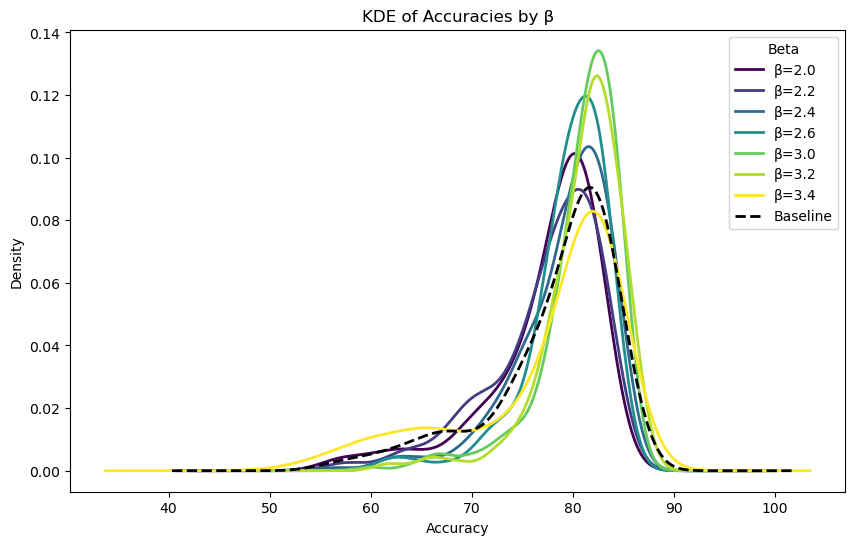

In [22]:
from matplotlib.colors import LogNorm

df = df_full[df_full['T'] == 1.0]
#df = df[df['beta'] >= 1.1]
df = df[df['beta'] != 2.8]
df = df[df['beta'] != 3.22]
#df = df_full

# normalize beta to [0,1] and pick a colormap
norm = LogNorm(vmin=df['beta'].min(), vmax=df['beta'].max())
cmap = plt.cm.viridis
fig, ax = plt.subplots(figsize=(10, 6))

for _, row in df.iterrows():
    print(row['beta'])
    s = pd.Series(row['accuracies'], dtype=float)
    c = cmap(norm(row['beta']))
    s.plot.kde(color=c, bw_method='scott', label=f"β={row['beta']}", linewidth=2, )

s = pd.Series(baseline, dtype=float)
s.plot.kde(color='black', bw_method='scott', label="Baseline", linewidth=2, linestyle='--')

plt.xlabel("Accuracy")
plt.title("KDE of Accuracies by β")
plt.legend(title="Beta")
plt.show()

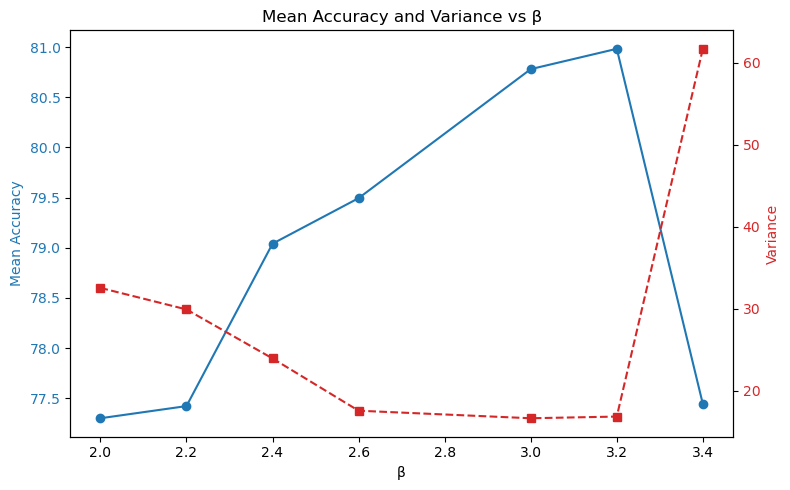

In [23]:
# compute variance of accuracies for each beta
df['variance'] = df['accuracies'].apply(lambda lst: np.var(lst))

# plot mean_accuracy and variance vs beta
fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()

ax1.plot(df['beta'], df['mean_accuracy'], 'o-', color='tab:blue', label='Mean Accuracy')
ax2.plot(df['beta'], df['variance'], 's--', color='tab:red', label='Variance')

ax1.set_xlabel('β')
ax1.set_ylabel('Mean Accuracy', color='tab:blue')
ax2.set_ylabel('Variance', color='tab:red')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax1.set_title('Mean Accuracy and Variance vs β')
fig.tight_layout()
plt.show()

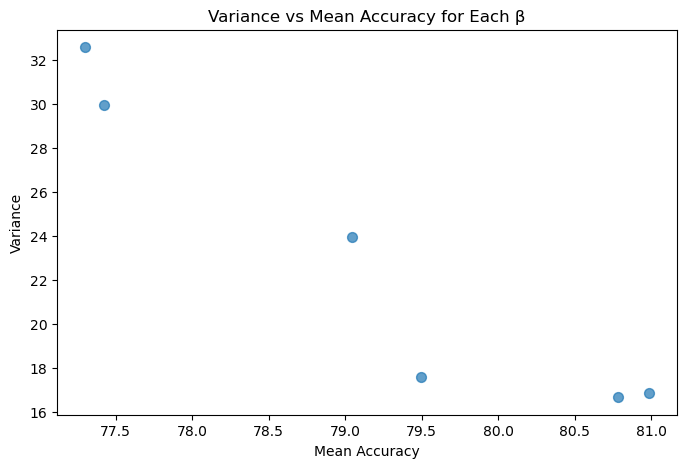

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df['mean_accuracy'], df['variance'], color='tab:blue', s=50, alpha=0.7)

ax.set_xlabel('Mean Accuracy')
ax.set_ylabel('Variance')
ax.set_title('Variance vs Mean Accuracy for Each β')

plt.show()